In [1]:
import torch
import torch.optim as optim
import torch.nn as nn
from torchsummary import summary
from model import Net
import utils

In [2]:
# CUDA?
cuda = torch.cuda.is_available()
device = torch.device("cuda" if cuda else "cpu")
print("CUDA Available?", cuda)

CUDA Available? False


In [3]:
batch_size = 512

kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}

test_loader = utils.gen_data_loader(train=False, **kwargs)
train_loader = utils.gen_data_loader(train=True, **kwargs)

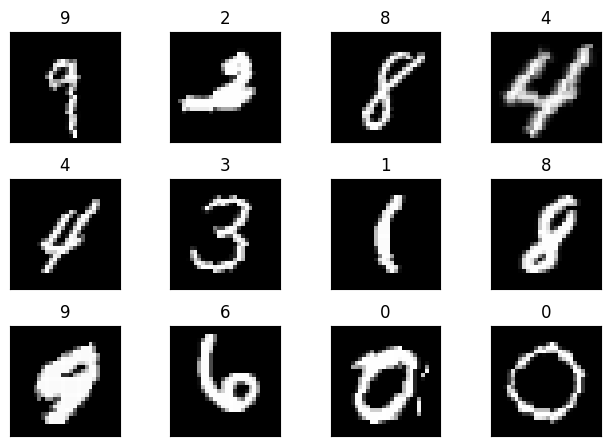

In [4]:
utils.viz_data(train_loader)

In [5]:
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             288
            Conv2d-2           [-1, 64, 24, 24]          18,432
            Conv2d-3          [-1, 128, 10, 10]          73,728
            Conv2d-4            [-1, 256, 8, 8]         294,912
            Linear-5                   [-1, 50]         204,800
            Linear-6                   [-1, 10]             500
Total params: 592,660
Trainable params: 592,660
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.67
Params size (MB): 2.26
Estimated Total Size (MB): 2.93
----------------------------------------------------------------


In [6]:
# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []
train_acc = []
test_acc = []

In [7]:
from utils import GetCorrectPredCount, train, test
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
# New Line
criterion = nn.CrossEntropyLoss()
num_epochs = 20

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer, criterion, train_acc, train_losses)
  test(model, device, train_loader, criterion, test_acc, test_losses)
  scheduler.step()

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 1


Train: Loss=0.2879 Batch_id=117 Accuracy=60.48: 100%|██████████| 118/118 [01:13<00:00,  1.61it/s]


Test set: Average loss: 0.0005, Accuracy: 54936/60000 (91.56%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=0.0564 Batch_id=117 Accuracy=94.23: 100%|██████████| 118/118 [01:11<00:00,  1.66it/s]


Test set: Average loss: 0.0003, Accuracy: 57510/60000 (95.85%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


Train: Loss=0.1368 Batch_id=117 Accuracy=96.40: 100%|██████████| 118/118 [01:13<00:00,  1.60it/s]


Test set: Average loss: 0.0002, Accuracy: 58302/60000 (97.17%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4


Train: Loss=0.0301 Batch_id=117 Accuracy=97.16: 100%|██████████| 118/118 [01:15<00:00,  1.57it/s]


Test set: Average loss: 0.0002, Accuracy: 58266/60000 (97.11%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 5


Train: Loss=0.0552 Batch_id=117 Accuracy=97.53: 100%|██████████| 118/118 [01:14<00:00,  1.59it/s]


Test set: Average loss: 0.0001, Accuracy: 58738/60000 (97.90%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 6


Train: Loss=0.0485 Batch_id=117 Accuracy=97.77: 100%|██████████| 118/118 [01:17<00:00,  1.52it/s]


Test set: Average loss: 0.0001, Accuracy: 58952/60000 (98.25%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 7


Train: Loss=0.0979 Batch_id=117 Accuracy=98.10: 100%|██████████| 118/118 [01:17<00:00,  1.52it/s]


Test set: Average loss: 0.0001, Accuracy: 59005/60000 (98.34%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 8


Train: Loss=0.0512 Batch_id=117 Accuracy=98.31: 100%|██████████| 118/118 [01:18<00:00,  1.51it/s]


Test set: Average loss: 0.0001, Accuracy: 59121/60000 (98.53%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 9


Train: Loss=0.0208 Batch_id=117 Accuracy=98.45: 100%|██████████| 118/118 [01:17<00:00,  1.52it/s]


Test set: Average loss: 0.0001, Accuracy: 59082/60000 (98.47%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 10


Train: Loss=0.0828 Batch_id=117 Accuracy=98.50: 100%|██████████| 118/118 [01:17<00:00,  1.52it/s]


Test set: Average loss: 0.0001, Accuracy: 59197/60000 (98.66%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 11


Train: Loss=0.0465 Batch_id=117 Accuracy=98.60: 100%|██████████| 118/118 [01:17<00:00,  1.53it/s]


Test set: Average loss: 0.0001, Accuracy: 59200/60000 (98.67%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 12


Train: Loss=0.0290 Batch_id=117 Accuracy=98.63: 100%|██████████| 118/118 [01:17<00:00,  1.53it/s]


Test set: Average loss: 0.0001, Accuracy: 59288/60000 (98.81%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 13


Train: Loss=0.0348 Batch_id=117 Accuracy=98.75: 100%|██████████| 118/118 [01:17<00:00,  1.52it/s]


Test set: Average loss: 0.0001, Accuracy: 59309/60000 (98.85%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 14


Train: Loss=0.0230 Batch_id=117 Accuracy=98.81: 100%|██████████| 118/118 [01:11<00:00,  1.66it/s]


Test set: Average loss: 0.0001, Accuracy: 59204/60000 (98.67%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 15


Train: Loss=0.0115 Batch_id=117 Accuracy=98.87: 100%|██████████| 118/118 [01:22<00:00,  1.43it/s]


Test set: Average loss: 0.0001, Accuracy: 59286/60000 (98.81%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 16


Train: Loss=0.0135 Batch_id=117 Accuracy=99.14: 100%|██████████| 118/118 [01:23<00:00,  1.41it/s]


Test set: Average loss: 0.0001, Accuracy: 59470/60000 (99.12%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 17


Train: Loss=0.0172 Batch_id=117 Accuracy=99.21: 100%|██████████| 118/118 [01:18<00:00,  1.50it/s]


Test set: Average loss: 0.0001, Accuracy: 59500/60000 (99.17%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 18


Train: Loss=0.0053 Batch_id=117 Accuracy=99.23: 100%|██████████| 118/118 [01:12<00:00,  1.63it/s]


Test set: Average loss: 0.0001, Accuracy: 59521/60000 (99.20%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 19


Train: Loss=0.0582 Batch_id=117 Accuracy=99.16: 100%|██████████| 118/118 [01:12<00:00,  1.63it/s]


Test set: Average loss: 0.0001, Accuracy: 59511/60000 (99.19%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 20


Train: Loss=0.0131 Batch_id=117 Accuracy=99.19: 100%|██████████| 118/118 [01:12<00:00,  1.64it/s]


Test set: Average loss: 0.0000, Accuracy: 59524/60000 (99.21%)

Adjusting learning rate of group 0 to 1.0000e-03.


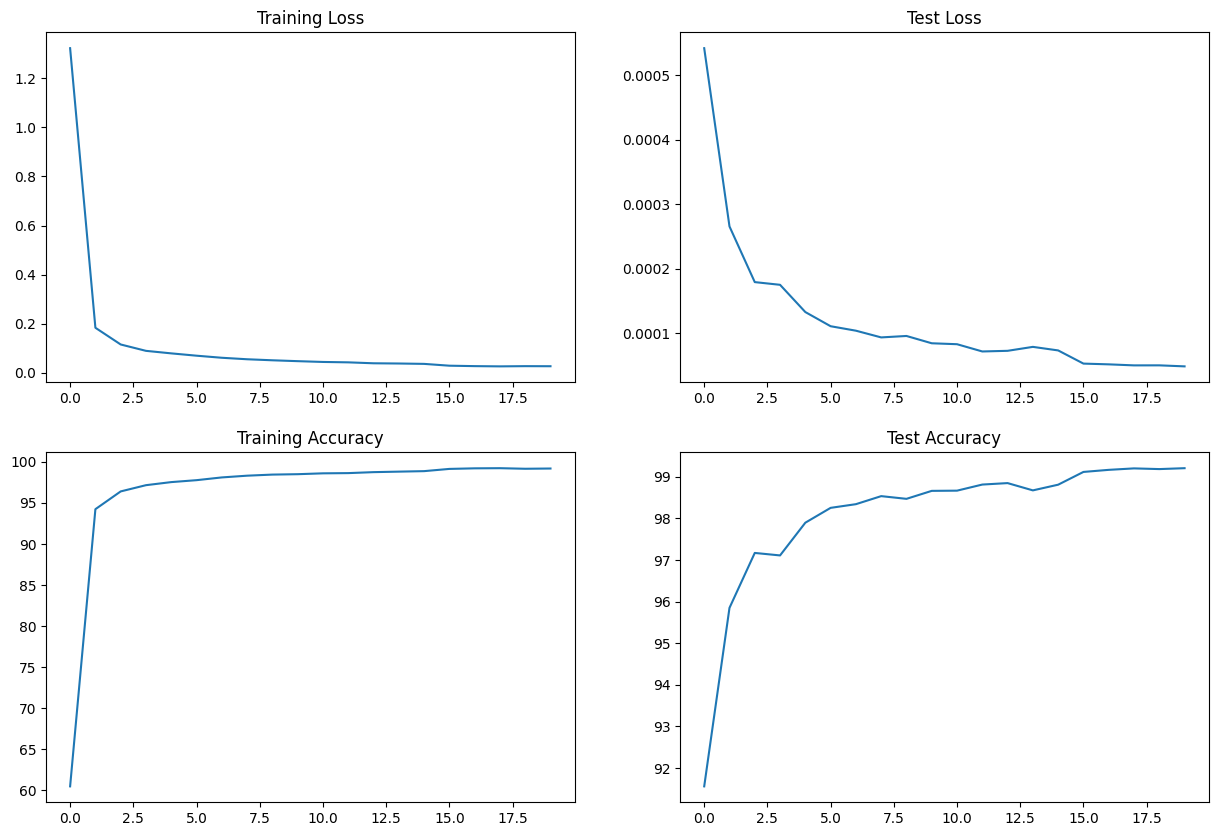

In [8]:
utils.viz_training_graphs(train_acc, train_losses, test_acc, test_losses)